In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt

from Automunge import *
am = AutoMunge()

import pickle
from copy import deepcopy
import statistics
import matplotlib.pyplot as plt

In [2]:
#load and consolidate experiments

exp_dict_list = []

#__________________
#first set

# (0,31)  
with open('notebook_a_qttf_030122_38_kr-vs-kp.pickle', 'rb') as handle:
  first_dict = pickle.load(handle)
  #first dict serves as seed for meta_dict
  meta_dict = deepcopy(first_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_b_powertransform_030122_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_c_binstransform_030122_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_d_ord3_030122_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_e_onht_030122_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_f_default_030122_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)



#__________________
#second set

# # (0,31)  
# with open('notebook_a_ordl_031422_38_kr-vs-kp.pickle', 'rb') as handle:
#   first_dict = pickle.load(handle)
#   #first dict serves as seed for meta_dict
#   meta_dict = deepcopy(first_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_a_ordl_031422_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_b_mnmx_031422_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_c_power_with_bins_031422_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_d_qttf_with_bins_031422_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_e_or19_031422_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)
  
# (124,155)
#other uploads follow similar template
with open('notebook_f_hsh2_031422_38_kr-vs-kp.pickle', 'rb') as handle:
  second_dict = pickle.load(handle)
  #after that dicts are appended to exp_dict_list
  exp_dict_list.append(second_dict)

In [3]:
exp_dict_list

[{'Click prediction': {'Task Id': 233146,
   'path': 'Click_prediction_small.csv',
   'TargetFeature': 'click',
   'experiments': {'powertransform': {'metrics_log': [0.7950142402201026,
      0.7950694853161997,
      0.7968711377187375,
      0.7945027061386518,
      0.7945218547977992],
     'time_log': [3995.4185874,
      3232.7866217000005,
      724.6709535,
      769.1837614999995,
      2228.0724014999996]}}},
  'C.C.FraudD.': {'Task Id': 233143,
   'path': 'dataset - CreditCardFraudDetection.csv',
   'TargetFeature': 'Class',
   'experiments': {'powertransform': {'metrics_log': [0.9995320486025453,
      0.9994760390808582,
      0.9991849496813352,
      0.9993798540865279,
      0.9994443077155228],
     'time_log': [379.9456674000012,
      1604.6678971000001,
      1535.2032126000013,
      1221.3630729999986,
      510.2025146999986]}}},
  'aloi': {'Task Id': 233142,
   'path': 'dataset - aloi.csv',
   'TargetFeature': 'target',
   'experiments': {}},
  'dionis': {'Task 

In [4]:
for exp_dict in exp_dict_list:
  if 'experiments' in exp_dict:
    for experiment in exp_dict['experiments']:
      if 'metrics_log' in exp_dict['experiments'][experiment]:
        if len(exp_dict['experiments'][experiment]['metrics_log']) \
        not in {0,5}:
          print(exp_dict)

In [5]:
for exp_dict in exp_dict_list:
  
  for experiment in exp_dict:
    
    if len(exp_dict[experiment]['experiments']) > 0:

      #notebooks are set up to only run one scenario
      for scenario in list(exp_dict[experiment]['experiments']):

        meta_dict[experiment]['experiments'].update({scenario : exp_dict[experiment]['experiments'][scenario]})
        
for experiment in meta_dict:
  
  if len(meta_dict[experiment]['experiments']) > 0:
    
    for scenario in list(meta_dict[experiment]['experiments']):
      
      print(scenario)
        
      meta_dict[experiment]['experiments'][scenario]['metric_avg'] = \
      pd.DataFrame({0:meta_dict[experiment]['experiments'][scenario]['metrics_log']})[0].mean()

      meta_dict[experiment]['experiments'][scenario]['time_avg'] = \
      pd.DataFrame({0:meta_dict[experiment]['experiments'][scenario]['time_log']})[0].mean()
        

meta_dict

qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_bins
qttf_with_bins
or19
hsh2
qttf
powertransform
binstransform
ord3
onht
default
ordl
mnmx
power_with_

{'Click prediction': {'Task Id': 233146,
  'path': 'Click_prediction_small.csv',
  'TargetFeature': 'click',
  'experiments': {'qttf': {'metrics_log': [0.793432878986247,
     0.7951656961550823,
     0.7926732238357209,
     0.7934008369718079,
     0.7908772953862504],
    'time_log': [1093.1466024000001,
     1300.7134684999999,
     2316.3624843000002,
     548.1215321999998,
     607.9663816000002],
    'metric_avg': 0.7931099862670218,
    'time_avg': 1173.2620938},
   'powertransform': {'metrics_log': [0.7950142402201026,
     0.7950694853161997,
     0.7968711377187375,
     0.7945027061386518,
     0.7945218547977992],
    'time_log': [3995.4185874,
     3232.7866217000005,
     724.6709535,
     769.1837614999995,
     2228.0724014999996],
    'metric_avg': 0.7951958848382981,
    'time_avg': 2190.02646512},
   'binstransform': {'metrics_log': [0.7922157085738761,
     0.7951444609712243,
     0.7938916240334476,
     0.7942028174165757,
     0.7951480438599772],
    'time_lo

In [6]:
final_results_dict = {}

for experiment in meta_dict:
  
  print(experiment)
  final_results_dict.update({experiment : {}})
  
  for scenario in meta_dict[experiment]['experiments']:
    print(scenario)
    print(meta_dict[experiment]['experiments'][scenario]['metric_avg'])
    
    final_results_dict[experiment].update({scenario : {
                                                       'metrics_log' : meta_dict[experiment]['experiments'][scenario]['metrics_log'],
                                                       'metric_avg' : meta_dict[experiment]['experiments'][scenario]['metric_avg'],
                                                       'time_log' : meta_dict[experiment]['experiments'][scenario]['time_log'],      
                                                       'time_avg' : meta_dict[experiment]['experiments'][scenario]['time_avg']}})
    
  print()
  

Click prediction
qttf
0.7931099862670218
powertransform
0.7951958848382981
binstransform
0.7941205309710202
ord3
0.7932667945745772
onht
0.7937712646282491
default
0.7958203677442348
ordl
0.7918071583835263
mnmx
0.7947266894250377
power_with_bins
0.7932610761911381
qttf_with_bins
0.7946068670476861
or19
0.7926495553685416
hsh2
0.7939538645079407

C.C.FraudD.
qttf
0.9994619770675245
powertransform
0.9994034398333579
binstransform
0.9995386207081511
ord3
0.9994694737423405
onht
0.9995705731809666
default
0.9996677630104296
ordl
0.9993593069503668
mnmx
0.9995307338254242
power_with_bins
0.9995470057522621
qttf_with_bins
0.9995652189040468
or19
0.9996687457477812
hsh2
0.9993493705346651

aloi

dionis

sylvine
qttf
0.9339647764836185
powertransform
0.9390617117175045
binstransform
0.9378024241094041
ord3
0.9285546323933861
onht
0.9289394206152742
default
0.9424953734070239
ordl
0.9482945011865977
mnmx
0.9359160521214662
power_with_bins
0.9353955206969472
qttf_with_bins
0.9292099943101618
or

In [7]:
#final_results_dict is in form
# {experiment : {scenario : {'metric_avg' : 'float', 'time_avg' : 'float'}}}

final_results_dict

{'Click prediction': {'qttf': {'metrics_log': [0.793432878986247,
    0.7951656961550823,
    0.7926732238357209,
    0.7934008369718079,
    0.7908772953862504],
   'metric_avg': 0.7931099862670218,
   'time_log': [1093.1466024000001,
    1300.7134684999999,
    2316.3624843000002,
    548.1215321999998,
    607.9663816000002],
   'time_avg': 1173.2620938},
  'powertransform': {'metrics_log': [0.7950142402201026,
    0.7950694853161997,
    0.7968711377187375,
    0.7945027061386518,
    0.7945218547977992],
   'metric_avg': 0.7951958848382981,
   'time_log': [3995.4185874,
    3232.7866217000005,
    724.6709535,
    769.1837614999995,
    2228.0724014999996],
   'time_avg': 2190.02646512},
  'binstransform': {'metrics_log': [0.7922157085738761,
    0.7951444609712243,
    0.7938916240334476,
    0.7942028174165757,
    0.7951480438599772],
   'metric_avg': 0.7941205309710202,
   'time_log': [3130.6597977,
    1076.2140832999999,
    1203.0672561000001,
    1920.2127615,
    4711.732

In [8]:
#calculate total average

scenarios = list(final_results_dict['Click prediction'])

h=0

#this is average accross trials
scenario_metrics_dict = {}
scenario_time_dict = {}
# for i, experiment in enumerate(final_results_dict):

# #this is average for each trial as a list
# scenario_metrics_trials_dict = {}
# scenario_time_trials_dict = {}

populated_scenario_count = 0

for scenario in scenarios:
  
  scenario_metric_list = []
  scenario_time_list = []
  
  scenario_metrics_dict.update({scenario : []})
  scenario_time_dict.update({scenario : []})
  
#   scenario_metrics_trials_dict.update({scenario : []})
#   scenario_time_trials_dict.update({scenario : []})
    
  populated_experiment_count = 0
  
  
  for experiment in final_results_dict:
    
    if scenario in final_results_dict[experiment]:
      
#       scenario_metric_list.append(final_results_dict[experiment][scenario]['metrics_log'][populated_experiment_count])
#       scenario_time_list.append(final_results_dict[experiment][scenario]['time_log'][populated_experiment_count])
    
      scenario_metrics_dict[scenario].append(final_results_dict[experiment][scenario]['metric_avg'])
      scenario_time_dict[scenario].append(final_results_dict[experiment][scenario]['time_avg'])
      
      populated_experiment_count += 1
      
#   scenario_metrics_trials_dict[scenario].append(scenario_metric_list)
#   scenario_time_trials_dict[scenario].append(scenario_time_list)
    

In [9]:
metric_list = []
metric_key_list = []

for scenario in scenario_metrics_dict:
  print()
  print(scenario)
  print(pd.DataFrame({0:scenario_metrics_dict[scenario]})[0].mean())
  
  metric_list.append(pd.DataFrame({0:scenario_metrics_dict[scenario]})[0].mean())
  metric_key_list.append(scenario)


qttf
0.8608836820426446

powertransform
0.8519103713879432

binstransform
0.8570319272265439

ord3
0.8570221933947342

onht
0.8553277895724266

default
0.8624769110648753

ordl
0.8411457318273222

mnmx
0.8512976419609996

power_with_bins
0.8573485501737832

qttf_with_bins
0.8557485421855584

or19
0.8582381908034884

hsh2
0.8474411587506506


In [10]:
#calculate total average

scenarios = list(final_results_dict['Click prediction'])

h=0

# #this is average accross trials
# scenario_metrics_dict = {}
# scenario_time_dict = {}
# # for i, experiment in enumerate(final_results_dict):

#this is average for each trial as a list
scenario_metrics_trials_dict = {}
scenario_time_trials_dict = {}



populated_scenario_count = 0

for scenario in scenarios:
  
  scenario_metric_list = []
  scenario_time_list = []
  
#   scenario_metrics_dict.update({scenario : []})
#   scenario_time_dict.update({scenario : []})
  
  scenario_metrics_trials_dict.update({scenario : len(final_results_dict.keys())*[[]]})
  scenario_time_trials_dict.update({scenario : len(final_results_dict.keys())*[[]]})
    

  for i, experiment in enumerate(final_results_dict):
    
    if scenario in final_results_dict[experiment]:
      
      
      
#       scenario_metric_list.append(final_results_dict[experiment][scenario]['metrics_log'][populated_experiment_count])
#       scenario_time_list.append(final_results_dict[experiment][scenario]['time_log'][populated_experiment_count])
    
#       scenario_metrics_dict[scenario].append(final_results_dict[experiment][scenario]['metric_avg'])
#       scenario_time_dict[scenario].append(final_results_dict[experiment][scenario]['time_avg'])
      
#       print(scenario_metrics_trials_dict[scenario])
      
      scenario_metrics_trials_dict[scenario][i] = final_results_dict[experiment][scenario]['metrics_log']
      scenario_time_trials_dict[scenario][i] = final_results_dict[experiment][scenario]['time_log']
  
  #remove experiments without results
  scenario_metrics_trials_dict[scenario] = \
  [x for x in scenario_metrics_trials_dict[scenario] if len(x) > 0 ]
  
  scenario_time_trials_dict[scenario] = \
  [x for x in scenario_time_trials_dict[scenario] if len(x) > 0 ]
  
  #now convert to dataframe
  scenario_metrics_trials_dict[scenario] = \
  pd.DataFrame(np.array(scenario_metrics_trials_dict[scenario]))
  
  scenario_time_trials_dict[scenario] = \
  pd.DataFrame(np.array(scenario_time_trials_dict[scenario]))
  
  #now convert to single row dataframe of averages accross trials
  scenario_metrics_trials_dict[scenario] = \
  scenario_metrics_trials_dict[scenario][scenario_metrics_trials_dict[scenario].columns].mean()
  
  scenario_time_trials_dict[scenario] = \
  scenario_time_trials_dict[scenario][scenario_time_trials_dict[scenario].columns].mean()
  
  #now add column header of scenario
  scenario_metrics_trials_dict[scenario] = \
  pd.DataFrame(scenario_metrics_trials_dict[scenario], columns = [scenario])
  
  scenario_time_trials_dict[scenario] = \
  pd.DataFrame(scenario_time_trials_dict[scenario], columns = [scenario])
  
  #note that this approach assumes a consistent number of trials for each experiment scenario
  #otherwise trials without full population won't have a consistent basis resulting in skew
          
#now consolidate into a single dataframe
trials_averages_df = pd.DataFrame(index = scenario_metrics_trials_dict[scenario].index)

trials_time_averages_df = pd.DataFrame(index = scenario_time_trials_dict[scenario].index)

for scenario in scenario_metrics_trials_dict:
  trials_averages_df = pd.concat([trials_averages_df, scenario_metrics_trials_dict[scenario]], axis=1)
  
for scenario in scenario_time_trials_dict:
  trials_time_averages_df = pd.concat([trials_time_averages_df, scenario_time_trials_dict[scenario]], axis=1)
  
  
# trials_averages_df
trials_time_averages_df



qttf  powertransform  binstransform         ord3         onht  \
0  2902.902961     3249.959894    3274.452679  3093.842226  2830.407473   
1  2883.531492     3318.633907    2618.963401  2725.033481  2771.995580   
2  2767.595632     2734.972377    2571.174446  2827.505254  2827.181193   
3  2842.060662     2683.481824    2296.778378  2985.626326  2750.985095   
4  2768.497369     2521.903225    2909.456451  2819.235329  3323.522374   

       default         ordl         mnmx  power_with_bins  qttf_with_bins  \
0  2764.278951  2552.055063  2737.954269      3195.684181     2938.420587   
1  2601.945222  2996.540475  3244.428708      2482.023983     2746.533147   
2  2703.403538  2618.328822  2835.379568      2763.505360     3156.300409   
3  3029.801005  2789.826186  2809.550049      2895.153585     2596.886475   
4  2776.577866  2955.111314  2917.430421      3020.573254     2641.071932   

          or19         hsh2  
0  3177.253715  3008.145536  
1  2544.202945  2606.703483  
2  3221.322331  3012.359014  
3  2753.356926  2973.277705  
4  2883.148187  3217.893055

In [11]:
#this corrects colu mn naming convention
trials_time_averages_df.rename(columns = {'power_with_bins' : 'capped quantiles',
                                          'qttf_with_bins' : 'or23'}, inplace=True)

trials_time_averages_df

qttf  powertransform  binstransform         ord3         onht  \
0  2902.902961     3249.959894    3274.452679  3093.842226  2830.407473   
1  2883.531492     3318.633907    2618.963401  2725.033481  2771.995580   
2  2767.595632     2734.972377    2571.174446  2827.505254  2827.181193   
3  2842.060662     2683.481824    2296.778378  2985.626326  2750.985095   
4  2768.497369     2521.903225    2909.456451  2819.235329  3323.522374   

       default         ordl         mnmx  capped quantiles         or23  \
0  2764.278951  2552.055063  2737.954269       3195.684181  2938.420587   
1  2601.945222  2996.540475  3244.428708       2482.023983  2746.533147   
2  2703.403538  2618.328822  2835.379568       2763.505360  3156.300409   
3  3029.801005  2789.826186  2809.550049       2895.153585  2596.886475   
4  2776.577866  2955.111314  2917.430421       3020.573254  2641.071932   

          or19         hsh2  
0  3177.253715  3008.145536  
1  2544.202945  2606.703483  
2  3221.322331  3012.359014  
3  2753.356926  2973.277705  
4  2883.148187  3217.893055

In [12]:
trials_averages_df.rename(columns = {'power_with_bins' : 'capped quantiles',
                                          'qttf_with_bins' : 'or23'}, inplace=True)

trials_averages_df

qttf  powertransform  binstransform      ord3      onht   default  \
0  0.861584        0.853222       0.856279  0.860610  0.854001  0.864087   
1  0.859547        0.854102       0.850542  0.850688  0.854686  0.863079   
2  0.862221        0.855394       0.860075  0.855228  0.855691  0.861894   
3  0.858150        0.841096       0.858444  0.859750  0.856369  0.862318   
4  0.862917        0.855739       0.859819  0.858835  0.855892  0.861008   

       ordl      mnmx  capped quantiles      or23      or19      hsh2  
0  0.825326  0.857584          0.857873  0.854965  0.859980  0.850182  
1  0.857310  0.859208          0.857691  0.851842  0.861220  0.839021  
2  0.855789  0.858580          0.857146  0.856198  0.859999  0.854328  
3  0.852083  0.822893          0.856942  0.858419  0.850167  0.841359  
4  0.815220  0.858223          0.857091  0.857318  0.859826  0.852315

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'qttf'),
  Text(1, 0, 'powertransform'),
  Text(2, 0, 'binstransform'),
  Text(3, 0, 'ord3'),
  Text(4, 0, 'onht'),
  Text(5, 0, 'default'),
  Text(6, 0, 'ordl'),
  Text(7, 0, 'mnmx'),
  Text(8, 0, 'capped quantiles'),
  Text(9, 0, 'or23'),
  Text(10, 0, 'or19'),
  Text(11, 0, 'hsh2')])

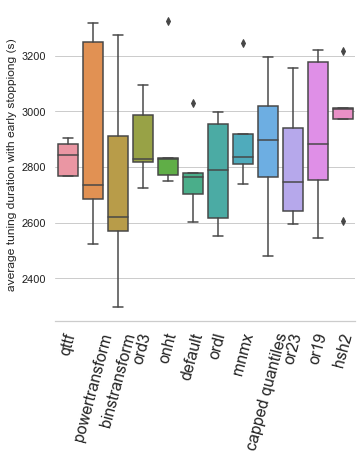

In [13]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trials_time_averages_df, kind='box',
)
g.despine(left=True)
g.set_axis_labels("", "average tuning duration with early stoppiong (s)")

plt.xticks(rotation=75, fontsize=16)
# g.legend.set_title("")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'qttf'),
  Text(1, 0, 'powertransform'),
  Text(2, 0, 'binstransform'),
  Text(3, 0, 'ord3'),
  Text(4, 0, 'onht'),
  Text(5, 0, 'default'),
  Text(6, 0, 'ordl'),
  Text(7, 0, 'mnmx'),
  Text(8, 0, 'capped quantiles'),
  Text(9, 0, 'or23'),
  Text(10, 0, 'or19'),
  Text(11, 0, 'hsh2')])

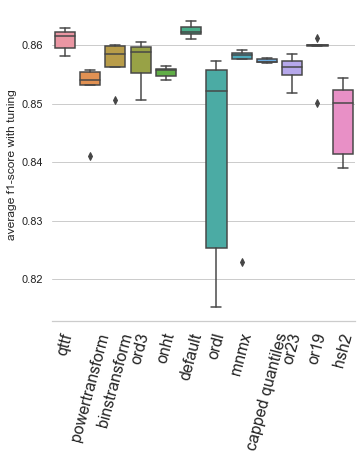

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trials_averages_df, kind='box',
)
g.despine(left=True)
g.set_axis_labels("", "average f1-score with tuning")

plt.xticks(rotation=75, fontsize=16)
# g.legend.set_title("")

In [30]:
#ok let's look just at the categoric variations / numeric features seperately


all_features = \
['qttf', 'powertransform', 'binstransform', 'ord3', 'onht', 'default', 'ordl', 'mnmx', 'capped quantiles', 'or23', 'or19', 'hsh2']

numeric_features = \
['default', 'qttf', 'powertransform', 'mnmx', 'capped quantiles', 'binstransform']

categoric_features = \
['default', 'onht', 'ord3', 'ordl', 'hsh2', 'or19'] #, 'or23']





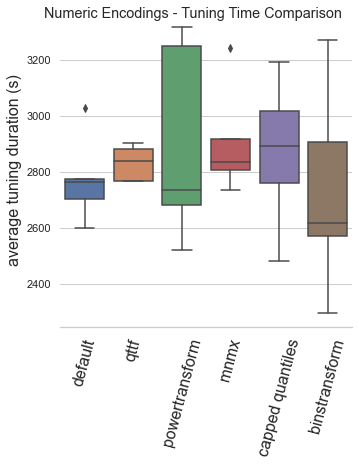

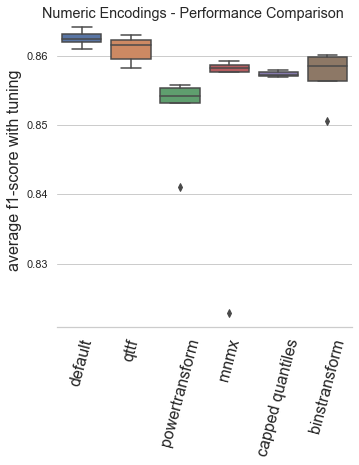

In [31]:
#numeric

sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trials_time_averages_df[numeric_features], 
    kind='box',
#     height=6,
)
g.despine(left=True)
g.set_axis_labels("", "average tuning duration (s)", fontsize=16)
g.fig.suptitle("Numeric Encodings - Tuning Time Comparison")

plt.xticks(rotation=75, fontsize=16)

g.fig.savefig("numeric_time_031422.png", bbox_inches='tight') 

#_________

sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trials_averages_df[numeric_features], 
    kind='box',
#     height=6,
)
g.despine(left=True)
g.set_axis_labels("", "average f1-score with tuning", fontsize=16)
g.fig.suptitle("Numeric Encodings - Performance Comparison")

plt.xticks(rotation=75, fontsize=16)

g.fig.savefig("numeric_performance_031422.png", bbox_inches='tight') 

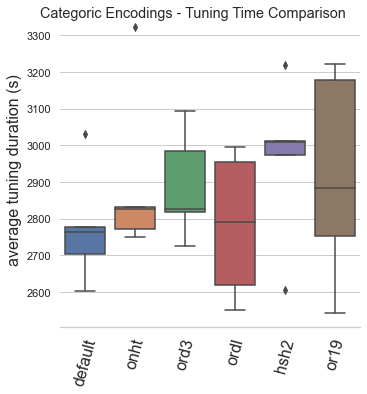

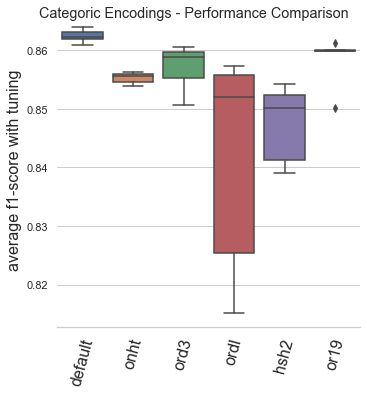

In [32]:
#categoric

sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trials_time_averages_df[categoric_features], kind='box',
)
g.despine(left=True)
g.set_axis_labels("", "average tuning duration (s)", fontsize=16)
g.fig.suptitle("Categoric Encodings - Tuning Time Comparison")

plt.xticks(rotation=75, fontsize=16)

g.fig.savefig("categoric_time_031422.png", bbox_inches='tight') 


#_________

sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=trials_averages_df[categoric_features], kind='box',
)
g.despine(left=True)
g.set_axis_labels("", "average f1-score with tuning", fontsize=16)
g.fig.suptitle("Categoric Encodings - Performance Comparison")

plt.xticks(rotation=75, fontsize=16)

g.fig.savefig("categoric_performance_031422.png", bbox_inches='tight') 



In [33]:
trials_averages_df

qttf  powertransform  binstransform      ord3      onht   default  \
0  0.861584        0.853222       0.856279  0.860610  0.854001  0.864087   
1  0.859547        0.854102       0.850542  0.850688  0.854686  0.863079   
2  0.862221        0.855394       0.860075  0.855228  0.855691  0.861894   
3  0.858150        0.841096       0.858444  0.859750  0.856369  0.862318   
4  0.862917        0.855739       0.859819  0.858835  0.855892  0.861008   

       ordl      mnmx  capped quantiles      or23      or19      hsh2  
0  0.825326  0.857584          0.857873  0.854965  0.859980  0.850182  
1  0.857310  0.859208          0.857691  0.851842  0.861220  0.839021  
2  0.855789  0.858580          0.857146  0.856198  0.859999  0.854328  
3  0.852083  0.822893          0.856942  0.858419  0.850167  0.841359  
4  0.815220  0.858223          0.857091  0.857318  0.859826  0.852315

In [19]:
import pandas as pd

asdf = pd.DataFrame()

In [20]:
scenario_metrics_trials_dict

{'qttf':        qttf
 0  0.861584
 1  0.859547
 2  0.862221
 3  0.858150
 4  0.862917,
 'powertransform':    powertransform
 0        0.853222
 1        0.854102
 2        0.855394
 3        0.841096
 4        0.855739,
 'binstransform':    binstransform
 0       0.856279
 1       0.850542
 2       0.860075
 3       0.858444
 4       0.859819,
 'ord3':        ord3
 0  0.860610
 1  0.850688
 2  0.855228
 3  0.859750
 4  0.858835,
 'onht':        onht
 0  0.854001
 1  0.854686
 2  0.855691
 3  0.856369
 4  0.855892,
 'default':     default
 0  0.864087
 1  0.863079
 2  0.861894
 3  0.862318
 4  0.861008,
 'ordl':        ordl
 0  0.825326
 1  0.857310
 2  0.855789
 3  0.852083
 4  0.815220,
 'mnmx':        mnmx
 0  0.857584
 1  0.859208
 2  0.858580
 3  0.822893
 4  0.858223,
 'power_with_bins':    power_with_bins
 0         0.857873
 1         0.857691
 2         0.857146
 3         0.856942
 4         0.857091,
 'qttf_with_bins':    qttf_with_bins
 0        0.854965
 1        0.851842
 

In [21]:
#note that default is binarizatino with z-score normalization
#note that numeric scenarios qttf/powertransform/binstransform are in conjunctino with binarization
#note that binstransform could be combined with powertransform
#note hat there are tradeoffs for training time demonstrated next cell
#latency is for training through bayesian tuning with early stop and doesn't include automunge run time
#which would not be significant in context of tuning iterations
#further scenario benchmarks pending

In [22]:
time_list = []
time_key_list = []

for scenario in scenario_time_dict:
  print()
  print(scenario)
  print(pd.DataFrame({0:scenario_time_dict[scenario]})[0].mean())
  
  time_list.append(pd.DataFrame({0:scenario_time_dict[scenario]})[0].mean())
  time_key_list.append(scenario)
  
# time_list


qttf
2832.917623047096

powertransform
2901.7902453354845

binstransform
2734.165070708386

ord3
2890.2485233703237

onht
2900.818343210323

default
2775.2013164045143

ordl
2782.3723720070975

mnmx
2908.948603048387

power_with_bins
2871.38807240645

qttf_with_bins
2815.8425099154824

or19
2915.856820749032

hsh2
2963.6757584174206
